In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 

from matplotlib.pyplot import figure

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


In [2]:
##Exploring Olist Geolocation
df_geo = pd.read_csv('olist_geolocation_dataset.csv')

In [3]:
df_geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
df_cust = pd.read_csv('olist_customers_dataset.csv')

In [6]:
df_cust.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [7]:
##Adding column "count", so can count the total number of purchases made. See below 
df_cust['count'] = 1
df_cust.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,count
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,1
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,1
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,1
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,1


In [8]:
df_cust_gr = df_cust.groupby(['customer_state']).sum()
df_cust_gr.drop(columns = ['customer_zip_code_prefix'], inplace = True)
df_cust_gr.head()

,count
customer_state,
AC,81
AL,413
AM,148
AP,68
BA,3380


In [9]:
df_cust_gr.index

Index(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS',
       'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC',
       'SE', 'SP', 'TO'],
      dtype='object', name='customer_state')

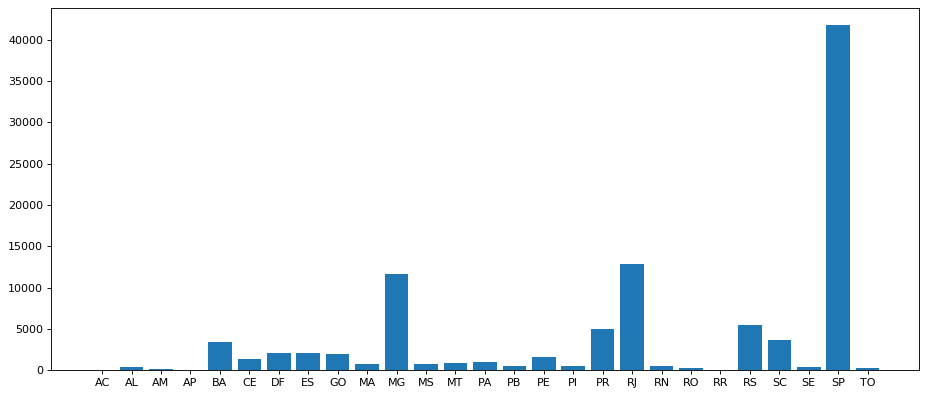

In [10]:
##X-states, Y-Sum amount purchases made by state
figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
plt.bar(df_cust_gr.index, df_cust_gr['count'])
plt.show()

In [11]:
df_ord = pd.read_csv('olist_orders_dataset.csv')
df_ord_cust = pd.merge(df_ord, df_cust, on = 'customer_id', how = 'inner')
df_ord_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 13 columns):
order_id                         99441 non-null object
customer_id                      99441 non-null object
order_status                     99441 non-null object
order_purchase_timestamp         99441 non-null object
order_approved_at                99281 non-null object
order_delivered_carrier_date     97658 non-null object
order_delivered_customer_date    96476 non-null object
order_estimated_delivery_date    99441 non-null object
customer_unique_id               99441 non-null object
customer_zip_code_prefix         99441 non-null int64
customer_city                    99441 non-null object
customer_state                   99441 non-null object
count                            99441 non-null int64
dtypes: int64(2), object(11)
memory usage: 10.6+ MB


In [12]:
df_ord.shape[0] == df_cust.shape[0]

True

In [13]:
df_ord_cust.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,count
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1


In [14]:
df_ord_cust.drop_duplicates(inplace=True)
df_ord_cust.dropna()
df_ord_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 13 columns):
order_id                         99441 non-null object
customer_id                      99441 non-null object
order_status                     99441 non-null object
order_purchase_timestamp         99441 non-null object
order_approved_at                99281 non-null object
order_delivered_carrier_date     97658 non-null object
order_delivered_customer_date    96476 non-null object
order_estimated_delivery_date    99441 non-null object
customer_unique_id               99441 non-null object
customer_zip_code_prefix         99441 non-null int64
customer_city                    99441 non-null object
customer_state                   99441 non-null object
count                            99441 non-null int64
dtypes: int64(2), object(11)
memory usage: 10.6+ MB


In [15]:
df_pay = pd.read_csv('olist_order_payments_dataset.csv')
df_items = pd.read_csv('olist_order_items_dataset.csv')
df_pay.drop_duplicates(inplace=True)
df_pay.dropna()
df_final = pd.merge(df_ord_cust, df_pay, on = 'order_id', how = 'inner')
df_fin = pd.merge(df_final, df_items, on = 'order_id', how = 'inner')
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117601 entries, 0 to 117600
Data columns (total 23 columns):
order_id                         117601 non-null object
customer_id                      117601 non-null object
order_status                     117601 non-null object
order_purchase_timestamp         117601 non-null object
order_approved_at                117586 non-null object
order_delivered_carrier_date     116356 non-null object
order_delivered_customer_date    115034 non-null object
order_estimated_delivery_date    117601 non-null object
customer_unique_id               117601 non-null object
customer_zip_code_prefix         117601 non-null int64
customer_city                    117601 non-null object
customer_state                   117601 non-null object
count                            117601 non-null int64
payment_sequential               117601 non-null int64
payment_type                     117601 non-null object
payment_installments             117601 non-null int

In [16]:
len(set(df_fin['customer_id']))

98665

In [17]:
len(set(df_fin['customer_unique_id']))

95419

In [18]:
df_fin['count'] = 1
df = df_fin.groupby(['customer_id']).sum()
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 98665 entries, 00012a2ce6f8dcda20d059ce98491703 to ffffa3172527f765de70084a7e53aae8
Data columns (total 8 columns):
customer_zip_code_prefix    98665 non-null int64
count                       98665 non-null int64
payment_sequential          98665 non-null int64
payment_installments        98665 non-null int64
payment_value               98665 non-null float64
order_item_id               98665 non-null int64
price                       98665 non-null float64
freight_value               98665 non-null float64
dtypes: float64(3), int64(5)
memory usage: 6.8+ MB


In [19]:
df_fin['timestamp'] = pd.to_datetime(df_fin['order_purchase_timestamp'])


In [ ]:
df_fin['day_of_week'] = df_fin['timestamp'].dt.day_name()

In [93]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117601 entries, 0 to 117600
Data columns (total 25 columns):
order_id                         117601 non-null object
customer_id                      117601 non-null object
order_status                     117601 non-null object
order_purchase_timestamp         117601 non-null object
order_approved_at                117586 non-null object
order_delivered_carrier_date     116356 non-null object
order_delivered_customer_date    115034 non-null object
order_estimated_delivery_date    117601 non-null object
customer_unique_id               117601 non-null object
customer_zip_code_prefix         117601 non-null int64
customer_city                    117601 non-null object
customer_state                   117601 non-null object
count                            117601 non-null int64
payment_sequential               117601 non-null int64
payment_type                     117601 non-null object
payment_installments             117601 non-null int

In [20]:
df_fin.sort_values(by=['timestamp']).iloc[0:10]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,timestamp
5292,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,NaN,2016-10-20 00:00:00,b7d76e111c89f7ebf14761390f0f7d17,69309,...,credit_card,1,136.23,1,c1488892604e4ba5cff5b4eb4d595400,1554a68530182680ad5c8b042c3ab563,2016-10-26 18:25:19,39.99,31.67,2016-09-04 21:15:19
5293,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,NaN,2016-10-20 00:00:00,b7d76e111c89f7ebf14761390f0f7d17,69309,...,credit_card,1,136.23,2,f293394c72c9b5fafd7023301fc21fc2,1554a68530182680ad5c8b042c3ab563,2016-10-26 18:25:19,32.90,31.67,2016-09-04 21:15:19
5132,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05 00:15:34,2016-10-07 13:17:15,NaN,NaN,2016-10-28 00:00:00,4854e9b3feff728c13ee5fc7d1547e92,99025,...,credit_card,3,75.06,1,f3c2d01a84c947b078e32bbef0718962,a425f92c199eb576938df686728acd20,2016-09-19 00:15:34,59.50,15.56,2016-09-05 00:15:34
98087,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-02 22:07:52,2016-10-06 15:50:56,NaN,NaN,2016-10-25 00:00:00,0eb1ee9dba87f5b36b4613a65074337c,2975,...,credit_card,1,109.34,1,d2998d7ced12f83f9b832f33cf6507b6,25e6ffe976bd75618accfe16cefcbd0d,2016-10-21 16:19:54,100.00,9.34,2016-10-02 22:07:52
110249,3b697a20d9e427646d92567910af6d57,355077684019f7f60a031656bd7262b8,delivered,2016-10-03 09:44:50,2016-10-06 15:50:54,2016-10-23 14:02:13,2016-10-26 14:02:13,2016-10-27 00:00:00,32ea3bdedab835c3aa6cb68ce66565ef,4106,...,boleto,1,45.46,1,3ae08df6bcbfe23586dd431c40bddbb7,522620dcb18a6b31cd7bdf73665113a9,2016-10-21 16:27:20,29.90,15.56,2016-10-03 09:44:50
33656,be5bc2f0da14d8071e2d45451ad119d9,7ec40b22510fdbea1b08921dd39e63d8,delivered,2016-10-03 16:56:50,2016-10-06 16:03:44,2016-10-21 16:33:46,2016-10-27 18:19:38,2016-11-07 00:00:00,2f64e403852e6893ae37485d5fcacdaf,98280,...,boleto,1,39.09,1,fd7fd78fd3cbc1b0a6370a7909c0a629,f09b760d23495ac9a7e00d29b769007c,2016-10-21 16:33:46,21.90,17.19,2016-10-03 16:56:50
109468,65d1e226dfaeb8cdc42f665422522d14,70fc57eeae292675927697fe03ad3ff5,canceled,2016-10-03 21:01:41,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08 10:58:34,2016-11-25 00:00:00,b8b8726af116a5cfb35b0315ecef9172,22770,...,credit_card,1,35.61,1,9c7bdf67b06b419aefb93cfdfc96c55d,ed49da7cadefc454d6a67de249eab240,2016-10-21 16:24:43,21.50,14.11,2016-10-03 21:01:41
115810,a41c8759fbe7aab36ea07e038b2d4465,6f989332712d3222b6571b1cf5b835ce,delivered,2016-10-03 21:13:36,2016-10-05 03:11:49,2016-10-25 11:57:59,2016-11-03 10:58:07,2016-11-29 00:00:00,61db744d2f835035a5625b59350c6b63,90040,...,boleto,1,53.73,1,b72b39418216e944bb34e35f4d3ea8c7,45d33f715e24d15a6ccf5c17b3a23e3c,2016-10-21 16:18:26,36.49,17.24,2016-10-03 21:13:36
104465,d207cc272675637bfed0062edffd0818,b8cf418e97ae795672d326288dfab7a7,delivered,2016-10-03 22:06:03,2016-10-04 10:28:07,2016-10-21 14:23:37,2016-10-31 11:07:42,2016-11-23 00:00:00,8d3a54507421dbd2ce0a1d58046826e0,13185,...,credit_card,6,133.46,1,107177bf61755f05c604fe57e02467d6,cca3071e3e9bb7d12640c9fbe2301306,2016-10-21 16:23:06,119.90,13.56,2016-10-03 22:06:03
7904,cd3b8574c82b42fc8129f6d502690c3e,7812fcebfc5e8065d31e1bb5f0017dae,delivered,2016-10-03 22:31:31,2016-10-04 10:19:23,2016-10-08 10:34:01,2016-10-14 16:08:00,2016-11-23 00:00:00,87776adb449c551e74c13fc34f036105,12030,...,credit_card,4,40.95,1,e2a1d45a73dc7f5a7f9236b043431b89,b499c00f28f4b7069ff6550af8c1348a,2016-10-08 10:34:01,29.99,10.96,2016-10-03 22:31:31


In [21]:
df_fin.order_status.value_counts()

delivered      115035
shipped          1244
canceled          566
processing        375
invoiced          371
unavailable         7
approved            3
Name: order_status, dtype: int64

In [22]:
df_fin.loc[df_fin['order_status'] == 'delivered']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,credit_card,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2017-10-02 10:56:33
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,voucher,1,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2017-10-02 10:56:33
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,voucher,1,18.59,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2017-10-02 10:56:33
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,boleto,1,141.46,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,2018-07-24 20:41:37
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,credit_card,3,179.12,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,2018-08-08 08:38:49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,...,credit_card,3,195.00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,2018-02-06 12:58:58
117597,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,...,credit_card,5,271.01,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,2017-08-27 14:46:43
117598,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,credit_card,4,441.16,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,2018-01-08 21:28:27
117599,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,credit_card,4,441.16,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,2018-01-08 21:28:27


In [23]:
## Dropping all canceled orders. Means purchase was not made
##df_fin.drop(df_fin.index[df_fin['order_status'] == 'canceled'], inplace = True)
##df_fin.drop(df_fin.index[df_fin['order_status'] == 'processing'], inplace = True)
##df_fin.drop(df_fin.index[df_fin['order_status'] == 'invoiced'], inplace = True)
##df_fin.drop(df_fin.index[df_fin['order_status'] == 'unavailable'], inplace = True)
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117601 entries, 0 to 117600
Data columns (total 24 columns):
order_id                         117601 non-null object
customer_id                      117601 non-null object
order_status                     117601 non-null object
order_purchase_timestamp         117601 non-null object
order_approved_at                117586 non-null object
order_delivered_carrier_date     116356 non-null object
order_delivered_customer_date    115034 non-null object
order_estimated_delivery_date    117601 non-null object
customer_unique_id               117601 non-null object
customer_zip_code_prefix         117601 non-null int64
customer_city                    117601 non-null object
customer_state                   117601 non-null object
count                            117601 non-null int64
payment_sequential               117601 non-null int64
payment_type                     117601 non-null object
payment_installments             117601 non-null int

In [26]:
df_2018 = df_fin.loc[(df_fin.timestamp>=pd.datetime(2018,1,1,0)) &\
                  (df_fin.timestamp<pd.datetime(2019,1,1,0))]

In [27]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63677 entries, 3 to 117600
Data columns (total 24 columns):
order_id                         63677 non-null object
customer_id                      63677 non-null object
order_status                     63677 non-null object
order_purchase_timestamp         63677 non-null object
order_approved_at                63677 non-null object
order_delivered_carrier_date     63252 non-null object
order_delivered_customer_date    62551 non-null object
order_estimated_delivery_date    63677 non-null object
customer_unique_id               63677 non-null object
customer_zip_code_prefix         63677 non-null int64
customer_city                    63677 non-null object
customer_state                   63677 non-null object
count                            63677 non-null int64
payment_sequential               63677 non-null int64
payment_type                     63677 non-null object
payment_installments             63677 non-null int64
payment_value 

## 

In [40]:
##df_2018['weekday'] = pd.Timestamp(df_2018['timestamp'])##.weekday()
##df_2018['timestamp'].apply(lambda x: pd.Timestamp(x).weekday())
##df_2018['day_of_week'] = df_2018['timestamp'].dt.day_name()

c:\users\gozefena\miniconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Creating a final version dataset for a linear regression model.

In [32]:
df_finito = df_fin.groupby(['customer_id']).count()
df_finito.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97585 entries, 00012a2ce6f8dcda20d059ce98491703 to ffffa3172527f765de70084a7e53aae8
Data columns (total 23 columns):
order_id                         97585 non-null int64
order_status                     97585 non-null int64
order_purchase_timestamp         97585 non-null int64
order_approved_at                97585 non-null int64
order_delivered_carrier_date     97585 non-null int64
order_delivered_customer_date    97585 non-null int64
order_estimated_delivery_date    97585 non-null int64
customer_unique_id               97585 non-null int64
customer_zip_code_prefix         97585 non-null int64
customer_city                    97585 non-null int64
customer_state                   97585 non-null int64
count                            97585 non-null int64
payment_sequential               97585 non-null int64
payment_type                     97585 non-null int64
payment_installments             97585 non-null int64
payment_value               

In [ ]:
df_final.set_index('')

In [124]:
df_final.truncate(df_fin.index[df_fin['order_status'], '2017-10-10', '2018-10-10').info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 2017aa1d9a2706825014b8d3aece07d6 to 2017aa1d9a2706825014b8d3aece07d6
Data columns (total 8 columns):
customer_zip_code_prefix    1 non-null int64
count                       1 non-null int64
payment_sequential          1 non-null int64
payment_installments        1 non-null int64
payment_value               1 non-null float64
order_item_id               1 non-null int64
price                       1 non-null float64
freight_value               1 non-null float64
dtypes: float64(3), int64(5)
memory usage: 72.0+ bytes


In [18]:
##more merged dfs

df1 = pd.read_csv('olist_orders_dataset.csv')
df4 = pd.read_csv('olist_order_items_dataset.csv')
df5 = pd.read_csv('olist_products_dataset.csv')
df3 = pd.read_csv('olist_order_payments_dataset.csv')

dfmerged1 = pd.merge(df1, df4, on = 'order_id', how = 'inner')
dfmerged2 = pd.merge(dfmerged1, df5, on = 'product_id', how = 'inner')
dfmerged3 = pd.merge(dfmerged2, df3, on = 'order_id', how = 'inner')

dfmerged3.drop_duplicates(inplace=True)

dfmerged3.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,268.0,4.0,500.0,19.0,8.0,13.0,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,268.0,4.0,500.0,19.0,8.0,13.0,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,268.0,4.0,500.0,19.0,8.0,13.0,2,voucher,1,18.59
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,87285b34884572647811a353c7ac498a,...,268.0,4.0,500.0,19.0,8.0,13.0,1,credit_card,3,37.77
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,87285b34884572647811a353c7ac498a,...,268.0,4.0,500.0,19.0,8.0,13.0,1,credit_card,1,37.77


In [19]:
dfmerged3.drop_duplicates(inplace=True)
dfmerged3.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 117601 entries, 0 to 117600
Data columns (total 26 columns):
order_id                         117601 non-null object
customer_id                      117601 non-null object
order_status                     117601 non-null object
order_purchase_timestamp         117601 non-null object
order_approved_at                117586 non-null object
order_delivered_carrier_date     116356 non-null object
order_delivered_customer_date    115034 non-null object
order_estimated_delivery_date    117601 non-null object
order_item_id                    117601 non-null int64
product_id                       117601 non-null object
seller_id                        117601 non-null object
shipping_limit_date              117601 non-null object
price                            117601 non-null float64
freight_value                    117601 non-null float64
product_category_name            115903 non-null object
product_name_lenght              115903 non-null

In [20]:
numeric_vars = ['price', 'freight_value', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g']
categorical_vars = ['product_category_name']   

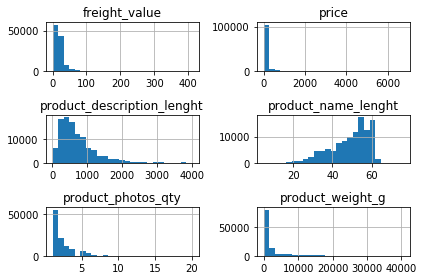

In [21]:
# Histograms
ax = dfmerged2[numeric_vars].hist(bins=25)
plt.tight_layout()

In [22]:
dfmerged3.describe()

,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value
count,117601.000000,117601.000000,117601.000000,115903.000000,115903.000000,115903.000000,117581.000000,117581.000000,117581.000000,117581.000000,117601.000000,117601.000000,117601.000000
mean,1.195900,120.824783,20.045990,48.767590,786.950855,2.207881,2114.309497,30.257235,16.630306,23.068574,1.093528,2.939482,172.686752
std,0.697706,184.479323,15.861315,10.035011,653.036231,1.719531,3788.798201,16.190920,13.458952,11.748468,0.726692,2.774223,267.592290
min,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000,0.000000,0.000000
25%,1.000000,39.900000,13.080000,42.000000,347.000000,1.000000,300.000000,18.000000,8.000000,15.000000,1.000000,1.000000,60.870000
50%,1.000000,74.900000,16.290000,52.000000,601.000000,1.000000,700.000000,25.000000,13.000000,20.000000,1.000000,2.000000,108.210000
75%,1.000000,134.900000,21.190000,57.000000,985.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,1.000000,4.000000,189.260000
max,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,29.000000,24.000000,13664.080000


In [23]:
formula = 'price ~ freight_value + payment_value + C(payment_type) + product_name_lenght + product_description_lenght + product_photos_qty + product_weight_g'

linear_model = smf.ols(formula=formula, data=dfmerged3).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                 1.789e+04
Date:                Fri, 06 Dec 2019   Prob (F-statistic):               0.00
Time:                        10:30:32   Log-Likelihood:            -7.1853e+05
No. Observations:              115902   AIC:                         1.437e+06
Df Residuals:                  115892   BIC:                         1.437e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                        -36.6057      1.947    -18.802      0.000     -40.422     -32.790
C(payment_type)[T.credit_card]    19.8924      0.892     22.296      0.000      18.144      21.641
C(payment_type)[T.debit_card]     18.6470      3.029      6.155      0.000      12.709      24.585
C(payment_type)[T.voucher]        52.3109      1.722     30.382      0.000      48.936      55.686
freight_value                      1.4644      0.029     50.747      0.000       1.408       1.521
payment_value                      0.4578      0.001    318.903      0.000       0.455       0.461
product_name_lenght                0.0082      0.035      0.231      0.817      -0.061       0.077
product_description_lenght         0.0223      0.001     40.622      0.000       0.021       0.023
product_photos_qty                 3.5212      0.207     17.015      0.000       3.116       3.927
product_weight_g                   0.0026      0.000     22.061      0.000       0.002       0.003
==============================================================================
Omnibus:                    73908.848   Durbin-Watson:                   0.810
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        254023027.494
Skew:                          -1.391   Prob(JB):                         0.00
Kurtosis:                     232.332   Cond. No.                     3.82e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
formula = 'price ~ product_weight_g + product_photos_qty'

linear_model = smf.ols(formula=formula, data=dfmerged2).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     7396.
Date:                Fri, 06 Dec 2019   Prob (F-statistic):               0.00
Time:                        10:30:32   Log-Likelihood:            -7.2932e+05
No. Observations:              111046   AIC:                         1.459e+06
Df Residuals:                  111043   BIC:                         1.459e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             75.6126      0.885     85.483      0.000      73.879      77.346
product_weight_g       0.0166      0.000    120.223      0.000       0.016       0.017
product_photos_qty     4.7016      0.300     15.656      0.000       4.113       5.290
==============================================================================
Omnibus:                   155793.845   Durbin-Watson:                   1.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         81360612.336
Skew:                           8.085   Prob(JB):                         0.00
Kurtosis:                     134.616   Cond. No.                     7.60e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
df3.head(30)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12
6,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16
7,3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84
8,1f78449c87a54faf9e96e88ba1491fa9,1,credit_card,6,341.09
9,0573b5e23cbd798006520e1d5b4c6714,1,boleto,1,51.95


In [26]:
df3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
order_id                103886 non-null object
payment_sequential      103886 non-null int64
payment_type            103886 non-null object
payment_installments    103886 non-null int64
payment_value           103886 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Text(0, 0.5, 'average product_weight_g')

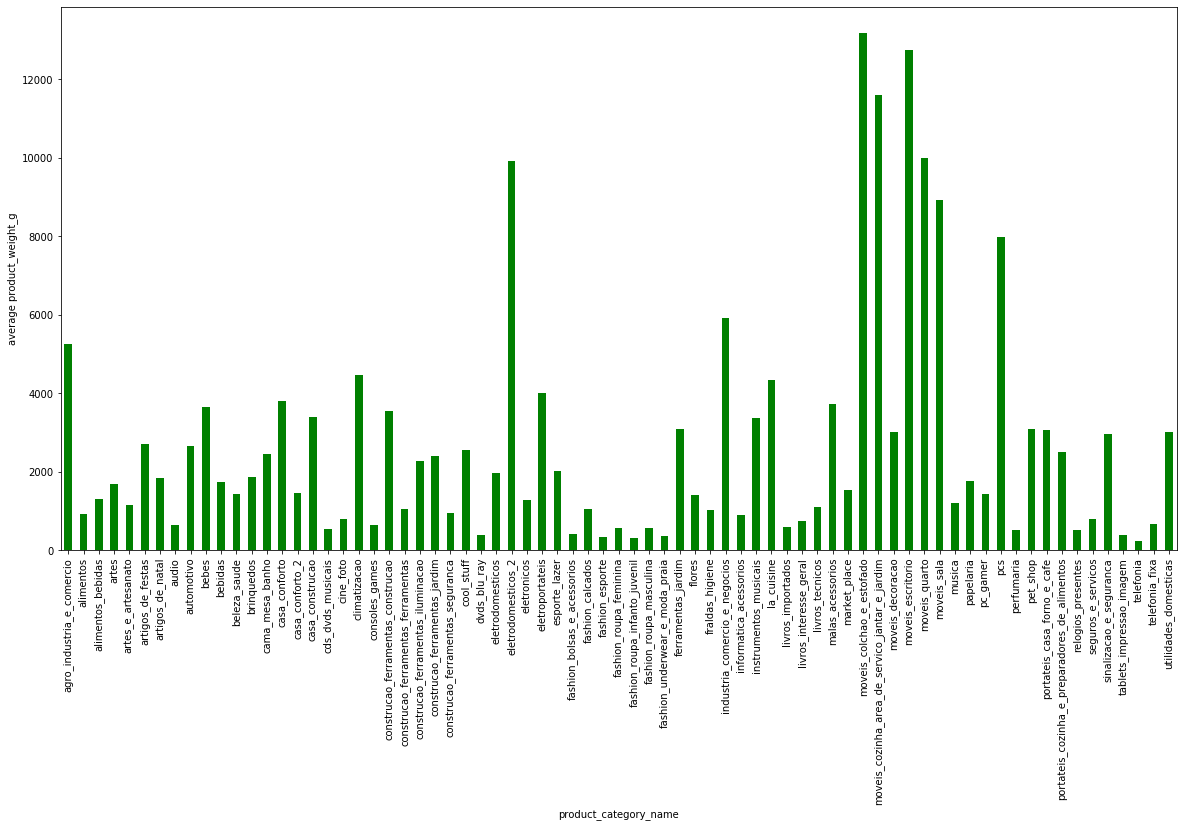

In [27]:
# Categorical vs Numeric

df5 = pd.read_csv('olist_products_dataset.csv')

agg = df5.groupby('product_category_name')['product_weight_g'].mean()
agg.plot(kind='bar', figsize=(20,10), color = ['green']).set_ylabel('average product_weight_g')

(1, 8)

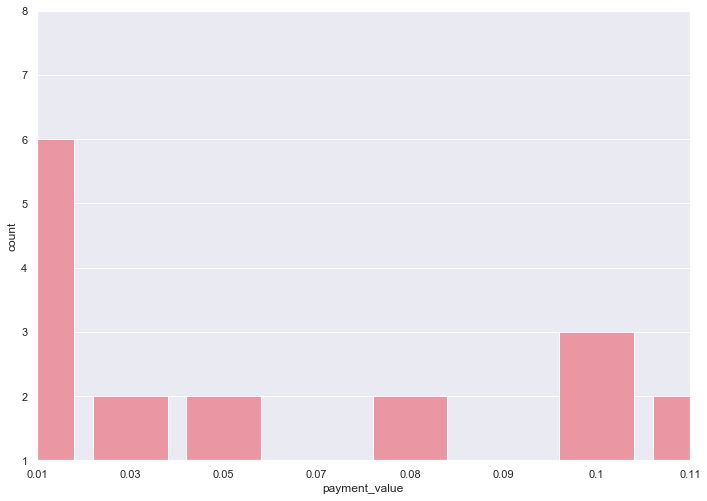

In [28]:
df3 = pd.read_csv('olist_order_payments_dataset.csv')

sns.set(rc={'figure.figsize':(11.7,8.27)}, style = 'darkgrid')
ax = sns.countplot(x = 'payment_value', data = df3)
plt.ylim(1,8) 
plt.xlim(1,8) 

Text(0, 0.5, 'avg_payment_value')

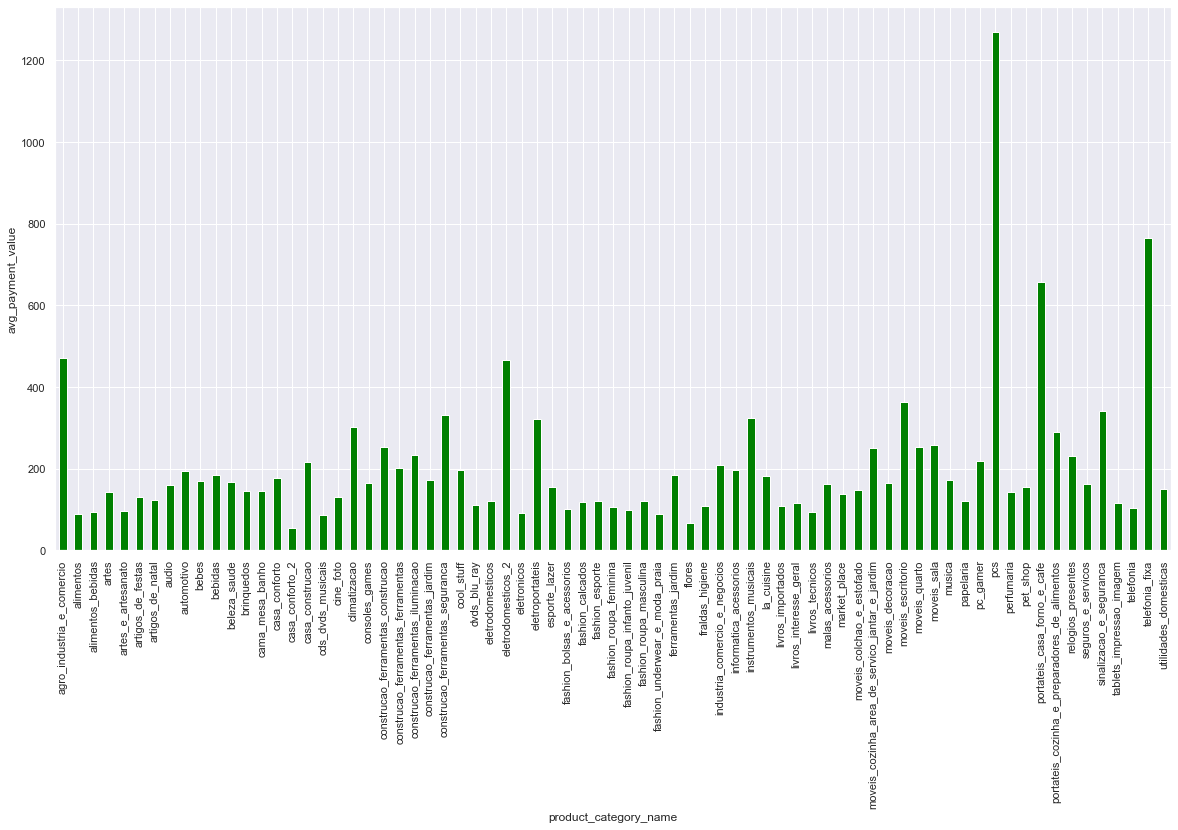

In [29]:
agg = dfmerged3.groupby('product_category_name')['payment_value'].mean()
agg.plot(kind='bar',figsize=(20,10), color = ['green']).set_ylabel('avg_payment_value')

In [30]:
import pandasql as ps

In [31]:
pysqldf = lambda: sqldf(q, globals())

In [32]:
q1 = "SELECT * FROM dfmerged3 WHERE payment_value > 600; "
test = ps.sqldf(q1,locals())

test.shape

(4674, 26)

In [33]:
test.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value
0,403b97836b0c04a622354cf531062e5f,738b086814c6fcc74b8cc583f8516ee3,delivered,2018-01-02 19:00:43,2018-01-02 19:09:04,2018-01-03 18:19:09,2018-01-20 01:38:59,2018-02-06 00:00:00,1,638bbb2a5e4f360b71f332ddfebfd672,...,143.0,2.0,20850.0,100.0,25.0,50.0,1,credit_card,10,1376.45
1,ce6d150fb29ada17d2082f4847107665,d8acb46c718975948423dbf1b603b959,delivered,2018-01-25 11:17:02,2018-01-27 12:35:38,2018-01-29 18:32:40,2018-02-21 17:38:51,2018-03-08 00:00:00,1,638bbb2a5e4f360b71f332ddfebfd672,...,143.0,2.0,20850.0,100.0,25.0,50.0,1,credit_card,10,1586.47
2,c7112d33d777ec13eb958ee0dbff02b3,ac56247052dbfac8b7453c1a558aa83f,delivered,2018-04-21 11:23:31,2018-04-24 17:42:41,2018-04-24 19:28:30,2018-04-30 15:50:38,2018-05-18 00:00:00,1,638bbb2a5e4f360b71f332ddfebfd672,...,143.0,2.0,20850.0,100.0,25.0,50.0,1,credit_card,10,1391.28
3,cc28b66895e0f6bfd7050ab5bc7b39bd,a2ea4194defe74e061e09d5edae0f67f,delivered,2018-06-15 20:46:53,2018-06-15 21:22:52,2018-06-18 12:06:00,2018-06-22 17:44:53,2018-07-17 00:00:00,1,638bbb2a5e4f360b71f332ddfebfd672,...,143.0,2.0,20850.0,100.0,25.0,50.0,1,credit_card,10,1589.57
4,2ce3c61f3add382691fcad6a04f52680,2bb90453c5b070eeacd965903f376375,delivered,2018-05-10 15:24:26,2018-05-10 16:21:02,2018-05-11 15:45:00,2018-06-04 17:32:40,2018-06-19 00:00:00,1,2b4609f8948be18874494203496bc318,...,492.0,3.0,250.0,22.0,10.0,18.0,1,boleto,1,1501.45


In [34]:
q1 = "SELECT * FROM test WHERE payment_installments = 1; "
test2 = ps.sqldf(q1,locals())
test2.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value
0,2ce3c61f3add382691fcad6a04f52680,2bb90453c5b070eeacd965903f376375,delivered,2018-05-10 15:24:26,2018-05-10 16:21:02,2018-05-11 15:45:00,2018-06-04 17:32:40,2018-06-19 00:00:00,1,2b4609f8948be18874494203496bc318,...,492.0,3.0,250.0,22.0,10.0,18.0,1,boleto,1,1501.45
1,2ce3c61f3add382691fcad6a04f52680,2bb90453c5b070eeacd965903f376375,delivered,2018-05-10 15:24:26,2018-05-10 16:21:02,2018-05-11 15:45:00,2018-06-04 17:32:40,2018-06-19 00:00:00,2,46e24ce614899e36617e37ea1e4aa6ff,...,549.0,1.0,30000.0,55.0,75.0,61.0,1,boleto,1,1501.45
2,848b0561d4bc26f57b288a5004f38683,4a38bf3ad3990d95c2c132f5bf530b95,delivered,2017-11-27 19:06:12,2017-11-27 19:19:02,2017-11-28 17:29:06,2017-12-05 13:48:54,2017-12-20 00:00:00,2,d1c427060a0f73f6b889a5c7c61f2ac4,...,1893.0,1.0,6550.0,20.0,20.0,20.0,1,credit_card,1,604.84
3,848b0561d4bc26f57b288a5004f38683,4a38bf3ad3990d95c2c132f5bf530b95,delivered,2017-11-27 19:06:12,2017-11-27 19:19:02,2017-11-28 17:29:06,2017-12-05 13:48:54,2017-12-20 00:00:00,3,d1c427060a0f73f6b889a5c7c61f2ac4,...,1893.0,1.0,6550.0,20.0,20.0,20.0,1,credit_card,1,604.84
4,848b0561d4bc26f57b288a5004f38683,4a38bf3ad3990d95c2c132f5bf530b95,delivered,2017-11-27 19:06:12,2017-11-27 19:19:02,2017-11-28 17:29:06,2017-12-05 13:48:54,2017-12-20 00:00:00,1,1b7ce992a80ac036dd9ab73d08289712,...,530.0,3.0,150.0,22.0,3.0,12.0,1,credit_card,1,604.84
5,848b0561d4bc26f57b288a5004f38683,4a38bf3ad3990d95c2c132f5bf530b95,delivered,2017-11-27 19:06:12,2017-11-27 19:19:02,2017-11-28 17:29:06,2017-12-05 13:48:54,2017-12-20 00:00:00,4,1b7ce992a80ac036dd9ab73d08289712,...,530.0,3.0,150.0,22.0,3.0,12.0,1,credit_card,1,604.84
6,848b0561d4bc26f57b288a5004f38683,4a38bf3ad3990d95c2c132f5bf530b95,delivered,2017-11-27 19:06:12,2017-11-27 19:19:02,2017-11-28 17:29:06,2017-12-05 13:48:54,2017-12-20 00:00:00,5,1b7ce992a80ac036dd9ab73d08289712,...,530.0,3.0,150.0,22.0,3.0,12.0,1,credit_card,1,604.84
7,848b0561d4bc26f57b288a5004f38683,4a38bf3ad3990d95c2c132f5bf530b95,delivered,2017-11-27 19:06:12,2017-11-27 19:19:02,2017-11-28 17:29:06,2017-12-05 13:48:54,2017-12-20 00:00:00,6,1b7ce992a80ac036dd9ab73d08289712,...,530.0,3.0,150.0,22.0,3.0,12.0,1,credit_card,1,604.84
8,848b0561d4bc26f57b288a5004f38683,4a38bf3ad3990d95c2c132f5bf530b95,delivered,2017-11-27 19:06:12,2017-11-27 19:19:02,2017-11-28 17:29:06,2017-12-05 13:48:54,2017-12-20 00:00:00,7,1b7ce992a80ac036dd9ab73d08289712,...,530.0,3.0,150.0,22.0,3.0,12.0,1,credit_card,1,604.84
9,848b0561d4bc26f57b288a5004f38683,4a38bf3ad3990d95c2c132f5bf530b95,delivered,2017-11-27 19:06:12,2017-11-27 19:19:02,2017-11-28 17:29:06,2017-12-05 13:48:54,2017-12-20 00:00:00,8,1b7ce992a80ac036dd9ab73d08289712,...,530.0,3.0,150.0,22.0,3.0,12.0,1,credit_card,1,604.84


In [35]:
df1 = pd.read_csv('olist_orders_dataset.csv')
df4 = pd.read_csv('olist_order_items_dataset.csv')
df5 = pd.read_csv('olist_products_dataset.csv')
df3 = pd.read_csv('olist_order_payments_dataset.csv')

dfmerged1 = pd.merge(df1, df4, on = 'order_id', how = 'inner')
dfmerged2 = pd.merge(dfmerged1, df5, on = 'product_id', how = 'inner')
dfmerged3 = pd.merge(dfmerged2, df3, on = 'order_id', how = 'inner')

dfmerged3.drop_duplicates(inplace=True)

dfmerged3.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,268.0,4.0,500.0,19.0,8.0,13.0,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,268.0,4.0,500.0,19.0,8.0,13.0,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,268.0,4.0,500.0,19.0,8.0,13.0,2,voucher,1,18.59
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,87285b34884572647811a353c7ac498a,...,268.0,4.0,500.0,19.0,8.0,13.0,1,credit_card,3,37.77
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,87285b34884572647811a353c7ac498a,...,268.0,4.0,500.0,19.0,8.0,13.0,1,credit_card,1,37.77


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

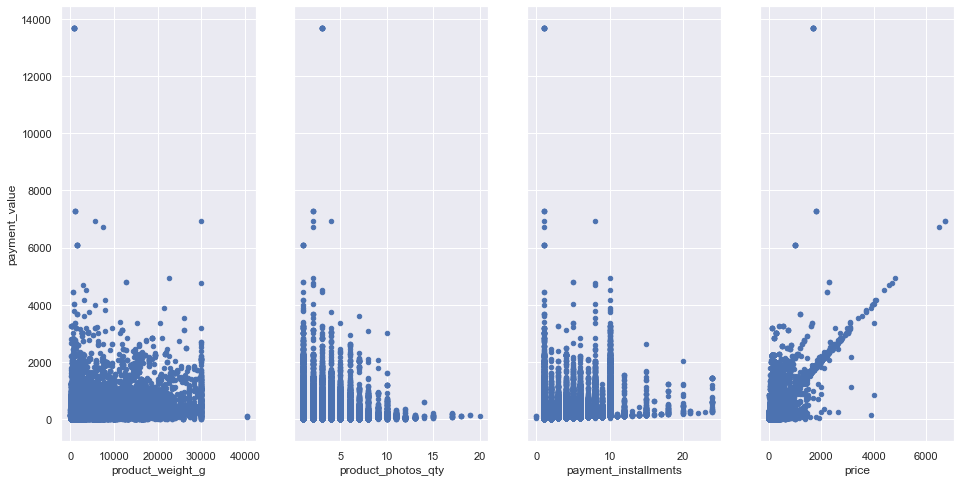

In [36]:
fig, axs = plt.subplots(1, 4, sharey=True)
dfmerged3.plot(kind= 'scatter', x= 'product_weight_g', y= 'payment_value', ax=axs[0], figsize=(16,8))
dfmerged3.plot(kind= 'scatter', x= 'product_photos_qty', y= 'payment_value', ax=axs[1], figsize=(16,8))
dfmerged3.plot(kind= 'scatter', x= 'payment_installments', y= 'payment_value', ax=axs[2], figsize=(16,8))
dfmerged3.plot(kind= 'scatter', x= 'price', y= 'payment_value', ax=axs[3], figsize=(16,8))

In [37]:
dfmerged3.dropna(how='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,268.0,4.0,500.0,19.0,8.0,13.0,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,268.0,4.0,500.0,19.0,8.0,13.0,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,268.0,4.0,500.0,19.0,8.0,13.0,2,voucher,1,18.59
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,87285b34884572647811a353c7ac498a,...,268.0,4.0,500.0,19.0,8.0,13.0,1,credit_card,3,37.77
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,87285b34884572647811a353c7ac498a,...,268.0,4.0,500.0,19.0,8.0,13.0,1,credit_card,1,37.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31 00:00:00,1,0df37da38a30a713453b03053d60d3f7,...,1105.0,1.0,2800.0,28.0,23.0,23.0,1,credit_card,10,748.24
117597,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31 00:00:00,2,0df37da38a30a713453b03053d60d3f7,...,1105.0,1.0,2800.0,28.0,23.0,23.0,1,credit_card,10,748.24
117598,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,delivered,2017-12-20 09:52:41,2017-12-20 10:09:52,2017-12-20 20:25:25,2018-01-26 15:45:14,2018-01-18 00:00:00,1,3d2c44374ee42b3003a470f3e937a2ea,...,372.0,2.0,300.0,16.0,6.0,12.0,1,credit_card,1,71.04
117599,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,1,ac35486adb7b02598c182c2ff2e05254,...,1517.0,1.0,1175.0,22.0,13.0,18.0,1,credit_card,3,85.08


In [38]:
dfmerged3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117601 entries, 0 to 117600
Data columns (total 26 columns):
order_id                         117601 non-null object
customer_id                      117601 non-null object
order_status                     117601 non-null object
order_purchase_timestamp         117601 non-null object
order_approved_at                117586 non-null object
order_delivered_carrier_date     116356 non-null object
order_delivered_customer_date    115034 non-null object
order_estimated_delivery_date    117601 non-null object
order_item_id                    117601 non-null int64
product_id                       117601 non-null object
seller_id                        117601 non-null object
shipping_limit_date              117601 non-null object
price                            117601 non-null float64
freight_value                    117601 non-null float64
product_category_name            115903 non-null object
product_name_lenght              115903 non-null

In [39]:
import statsmodels.formula.api as smf
ln = smf.ols(formula = 'payment_value ~ price', data = dfmerged3).fit()
ln.params

Intercept    43.082060
price         1.072666
dtype: float64

In [40]:
ln.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          payment_value   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                 1.419e+05
Date:                Fri, 06 Dec 2019   Prob (F-statistic):               0.00
Time:                        10:34:40   Log-Likelihood:            -7.7765e+05
No. Observations:              117601   AIC:                         1.555e+06
Df Residuals:                  117599   BIC:                         1.555e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     43.0821      0.628     68.612      0.000      41.851      44.313
price          1.0727      0.003    376.726      0.000       1.067       1.078
==============================================================================
Omnibus:                   281924.905   Durbin-Watson:                   0.443
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       8995266776.567
Skew:                          24.304   Prob(JB):                         0.00
Kurtosis:                    1357.027   Cond. No.                         264.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
dfmerged3.max(axis=0)['price'] 

6735.0

In [42]:
dfmerged3.min(axis=0)['price']

0.85

In [43]:
X_new = pd.DataFrame({'price':[7735.0, 8735.0, 9735.0, 10735.0]})
X_new.head()

,price
0,7735.0
1,8735.0
2,9735.0
3,10735.0


In [44]:
preds = ln.predict(X_new)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


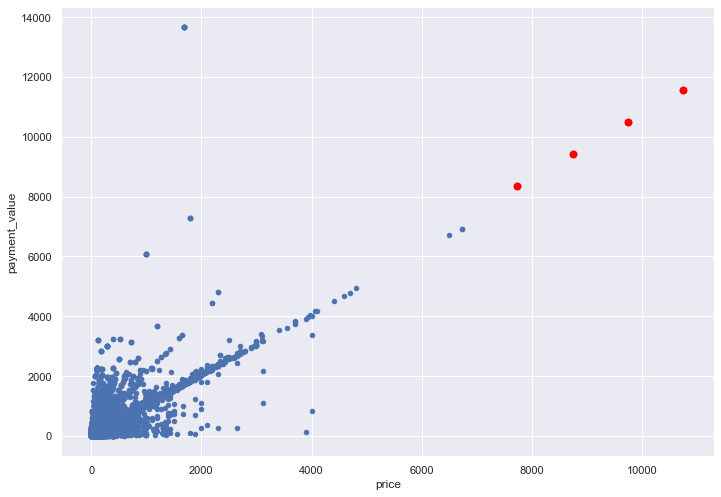

In [45]:
# X_new = pd.DataFrame({'price' : [dfmerged3.price.min(), dfmerged3.price.max()]})
# preds = ln.predict(X_new)
dfmerged3.plot(kind = 'scatter', x='price', y='payment_value')
plt.scatter(X_new, preds, c='red', linewidth=2)

In [46]:
X_new.describe()

,price
count,4.000000
mean,9235.000000
std,1290.994449
min,7735.000000
25%,8485.000000
50%,9235.000000
75%,9985.000000
max,10735.000000
